In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Mestrado/sentiment_dataset.csv')

In [3]:
df = df[ (df['sentiment'] == 'negative') |   (df['sentiment'] == 'positive')]

In [25]:
df

,Unnamed: 0,text,sentiment,en-sentiment,sentiment-fast
3,3,"Hi, I am suffering from the same sleep problem...",negative,negative,negative
10,10,"Hi allThanks for ur replies , my son is 25 mon...",positive,negative,negative
11,11,I am having the exact same issue and no one ca...,negative,negative,negative
12,12,I had a softball size inguinal hernia in Augus...,negative,negative,positive
14,14,I wanted to circle back around and see how it ...,positive,positive,positive
...,...,...,...,...,...
480,195,"I have been experiencing similar issues, I hav...",negative,negative,negative
481,196,This is the first time that I have heard anyon...,negative,negative,negative
483,198,Thank you for posting. I saw starting to think...,negative,negative,negative
485,200,I have been doing his for years. especially at...,negative,positive,positive


In [4]:
#pd.concat([X_train, y_train], axis=1).to_csv('train.csv')

In [5]:
#pd.concat([X_test, y_test], axis=1).to_csv('dev.csv')

In [6]:
!pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 401 kB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 58.7 MB/s 
     |████████████████████████████████| 19.7 MB 377 kB/s 
     |████████████████████████████████| 4.2 MB 31.8 MB/s 
     |████████████████████████████████| 1.6 MB 50.5 MB/s 
     |████████████████████████████████| 981 kB 60.7 MB/s 
     |████████████████████████████████| 788 kB 41.4 MB/s 
     |████████████████████████████████| 46 kB 5.0 MB/s 
     |████████████████████████████████| 86 kB 6.6 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 199 kB 68.6 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 6.6 MB 47.2 MB/s 
     |████████████████████████████████| 596 kB 65.0 MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=f509e52fe96b0def

In [7]:
!pip install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 5.2 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=6fe61f6b386d260a688c3f8bd3790e95a0684c9f380e8137a184c346d20ee939
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [8]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
 pip install --upgrade flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import flair
flair_sentiment = flair.models.TextClassifier.load('sentiment-fast')

2022-06-10 09:07:23,315 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-fasttext-rnn/sentiment-en-mix-ft-rnn_v8.pt not found in cache, downloading to /tmp/tmpfj5uuuea


100%|██████████| 1241977025/1241977025 [02:35<00:00, 7994778.68B/s]

2022-06-10 09:09:59,127 copying /tmp/tmpfj5uuuea to cache at /root/.flair/models/sentiment-en-mix-ft-rnn_v8.pt


2022-06-10 09:10:03,544 removing temp file /tmp/tmpfj5uuuea
2022-06-10 09:10:03,709 loading file /root/.flair/models/sentiment-en-mix-ft-rnn_v8.pt


In [11]:
sentence = "i really like you but you can be so dumb sometimes"

In [12]:
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
total_sentiment

['Sentence: "i really like you but you can be so dumb sometimes"'/'NEGATIVE' (0.767)]

In [13]:
tokens = [token.text for token in s.tokens]
ss = [flair.data.Sentence(s) for s in tokens]
[flair_sentiment.predict(s) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[-2].startswith("POS")] for s in ss]



In [14]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

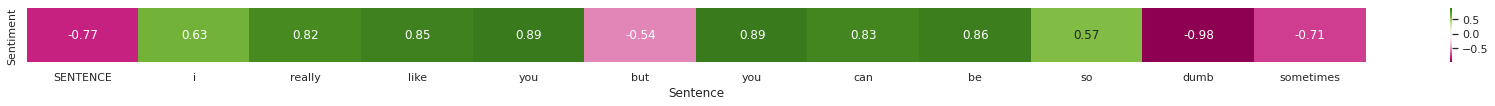

In [15]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[-2].startswith("POS")]] + sentiments,
})

In [16]:
def predict_sentiment(sentence):
  s = flair.data.Sentence(sentence)
  flair_sentiment.predict(s)
  total_sentiment = s.labels

  if "POSITIVE" in str(total_sentiment):
    return "positive"
  elif "NEGATIVE" in str(total_sentiment):
    return "negative"
  else:
    return "neutral"

In [17]:
df.head()

,Unnamed: 0,text,sentiment
3,3,"Hi, I am suffering from the same sleep problem...",negative
10,10,"Hi allThanks for ur replies , my son is 25 mon...",positive
11,11,I am having the exact same issue and no one ca...,negative
12,12,I had a softball size inguinal hernia in Augus...,negative
14,14,I wanted to circle back around and see how it ...,positive


In [18]:
from flair.models import TextClassifier
from flair.data import Sentence

sia = TextClassifier.load('sentiment')

2022-06-10 09:10:31,296 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp_qifntlh


100%|██████████| 265512723/265512723 [02:38<00:00, 1675362.28B/s]

2022-06-10 09:13:10,198 copying /tmp/tmp_qifntlh to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-06-10 09:13:10,771 removing temp file /tmp/tmp_qifntlh
2022-06-10 09:13:10,815 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [19]:
def sentiment_flair(sentence):
  sentence = Sentence(sentence)
  sia.predict(sentence)
  score = sentence.labels[0]

  if "POSITIVE" in str(score):
    return "positive"
  elif "NEGATIVE" in str(score):
    return "negative"
  else:
    return "neutral"

In [20]:
df['en-sentiment'] = df['text'].apply(sentiment_flair)

In [21]:
df['sentiment-fast'] = df['text'].apply(predict_sentiment)

In [22]:
df

,Unnamed: 0,text,sentiment,en-sentiment,sentiment-fast
3,3,"Hi, I am suffering from the same sleep problem...",negative,negative,negative
10,10,"Hi allThanks for ur replies , my son is 25 mon...",positive,negative,negative
11,11,I am having the exact same issue and no one ca...,negative,negative,negative
12,12,I had a softball size inguinal hernia in Augus...,negative,negative,positive
14,14,I wanted to circle back around and see how it ...,positive,positive,positive
...,...,...,...,...,...
480,195,"I have been experiencing similar issues, I hav...",negative,negative,negative
481,196,This is the first time that I have heard anyon...,negative,negative,negative
483,198,Thank you for posting. I saw starting to think...,negative,negative,negative
485,200,I have been doing his for years. especially at...,negative,positive,positive


In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(df['sentiment'].tolist(), df['en-sentiment'].tolist()))
print(classification_report(df['sentiment'].tolist(), df['en-sentiment'].tolist()))
print(accuracy_score(df['sentiment'].tolist(), df['en-sentiment'].tolist()))

[[126  16]
 [ 17  38]]
              precision    recall  f1-score   support

    negative       0.88      0.89      0.88       142
    positive       0.70      0.69      0.70        55

    accuracy                           0.83       197
   macro avg       0.79      0.79      0.79       197
weighted avg       0.83      0.83      0.83       197

0.8324873096446701


In [31]:
print(confusion_matrix(df['sentiment'].tolist(), df['sentiment-fast'].tolist()))
print(classification_report(df['sentiment'].tolist(), df['sentiment-fast'].tolist()))
print(accuracy_score(df['sentiment'].tolist(), df['sentiment-fast'].tolist()))

[[117  25]
 [ 18  37]]
              precision    recall  f1-score   support

    negative       0.87      0.82      0.84       142
    positive       0.60      0.67      0.63        55

    accuracy                           0.78       197
   macro avg       0.73      0.75      0.74       197
weighted avg       0.79      0.78      0.79       197

0.7817258883248731


# Zero shots and few shots

# GAN-BERT (in Pytorch and compatible with HuggingFace)

This is a Pytorch (+ **Huggingface** transformers) implementation of the GAN-BERT model from https://github.com/crux82/ganbert. While the original GAN-BERT was an extension of BERT, this implementation can be adapted to several architectures, ranging from Roberta to Albert!

**NOTE**: given that this implementation is different from the original one in Tensorflow, some results can be slighty different.
